In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.
C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 27s 456us/step - loss: 0.1653 - acc: 0.9481
Epoch 2/5
60000/60000 [==============================] - 26s 434us/step - loss: 0.0483 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 27s 444us/step - loss: 0.0334 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 27s 445us/step - loss: 0.0252 - acc: 0.99271s - l
Epoch 5/5
60000/60000 [==============================] - 28s 459us/step - loss: 0.0204 - acc: 0.9941


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 176us/step


0.9921

# 합성곱 연산
완전 연결 층과 합성곱 층 사이의 근본적인 차이는 다음과 같습니다. Dense 층은 입력 특성 공간에 있는 전역 패턴을 학습하지만 합성곱 층은 지역 패턴을 학습합니다. 

- 학습된 패턴은 평행 이동 불변성을 가집니다. 컨브넷이 이미지의 오른쪽 아래 모서리에서 어떤 패턴을 학습했다면 다른 곳(예를 들어 왼쪽 위 모서리)에서도 이 패턴을 인식할 수 있습니다. 완전 연결 네트워크는 새로운 위치에 나타난 것은 새로운 패턴으로 학습해야 하ㅂ니다. 이런 성질은 컨브넷이 이미지를 효율적으로 처리하게 만들어 줍니다. 적은 수의 훈련 샘플을 사용해서 일반화 능력을 가진 표현을 학습할 수 있습니다.

- 컨브넷은 패턴의 공간적 계층 구조를 학습할 수 있습니다. 첫 번째 합성곱 층이 에지 같은 작은 지역 패턴을 학습합니다. 두 번째 합성곱 층은 첫 번째 층의 특성으로 구성된 더 큰 패턴을 학습하는 식입니다. 이런 방식을 사용하여 컨브넷은 매우 복잡하고 추상적인 시각적 개념을 효과적으로 학습할 수 있습니다.

합성곱 연산은 특성 맵이라고 부르는 3D 텐서에 적용됩니다. 이 텐서는 2개의 공간축과 깊이축으로 구성됩니다.
합성곱은 핵심적인 2개의 파라미터로 정의됩니다.
- 입력으로부터 뽑아낼 패치의 크기 : 전형적으로 3x3 또는 5x5 크기를 사용합니다. 이 예에서는 일반적으로 많이 사용하는 3x3 크기를 사용했습니다.
- 특성 맵의 출력 깊이 : 합성곱으로 계산할 필터의 수입니다. 이 예에서는 깊이 32로 시작해서 깊이 64로 끝났습니다.

## 경계 문제와 패딩 이해하기
입력과 동일한 높이와 너비를 가진 출력 특성 맵을 얻고 싶다면 패딩을 사용할 수 있습니다. 패딩은 입력 특성 맵의 가장자리에 적절한 개수의 행과 열을 추가합니다.

## 합성곱 스트라이드 이해하기
출력 크기에 영향을 미치는 다른 요소는 스트라이드입니다. 두 번의 연속적인 윈도우 사이의 거리가 스트라이드라고 불리는 합성곱의 파라미터입니다. 스트라이드의 기본값은 1입니다. 스트라이드가 1보다 큰 스트라이드 합성곱도 가능합니다.

## 최대 풀링 연산
최대 풀링은 입력 특성 맵에서 윈도우에 맞는 패치를 추출하고 각 채널별로 최댓값을 출력합니다. 합성곱과 가장 큰 차이점은 최대 풀링은 보통 2x2 윈도우와 스트라이드 2를 사용하여 특성 맵을 절반 크기로 다운샘플링한다는 것입니다. 이에 반해 합성곱은 전형적으로 3x3 윈도우와 스트라이드 1을 사용합니다.

In [5]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3,3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3,3), activation='relu'))

In [6]:
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


위 모델에서의 문제점

- 특성의 공간적 계층 구조를 학습하는 데 도움이 되지 않습니다. 세 번째 층의 3x3 윈도우는 초기 입력의 7x7 윈도우 영역에 대한 정보만 담고 있습니다. 컨브넷에 의해 학습된 고수준 패턴은 초기 입력에 관한 정보가 아주 적어 숫자 분류를 학습하기에 충분하지 않을 것입니다. 마지막 합성곱 층의 특성이 전체 입력에 대한 정보를 가지고 있어야 합니다.
- 최종 특성 맵은 22x22x64=30,976개의 가중치를 가집니다. 아주 많습니다. 이 컨브넷을 펼친 후 512 크기의 Dense 층과 연결한다면 약 15.8백만 개의 가중치 파라미터가 생깁니다. 작은 모델치고는 너무 많은 가중치고, 심각한 과대적합이 발생할 것입니다.

간단히 말해서 다운샘플링을 사용하는 이유는 처리할 특성 맵의 가중치 개수를 줄이기 위해서입니다.

# 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

## 작은 데이터셋 문제에서 딥러닝의 타당성
딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것입니다. 하지만 많은 샘플이 의미하는 것은 상대적입니다. 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용합니다. 매우 작은 이미지 데이터셋에서 어떤 종류의 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있습니다.

## 데이터 내려받기

In [7]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'
base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: # 처음 1000개의 고양이 이미지를 train_cats_dir에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: # 다음 500개의 고양이 이미지를 validation_cats_dir에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: # 다음 500개의 고양이 이미지를 test_cats_dir에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: # 처음 1000의 강아지 이미지를 train_dogs_dir에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: # 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: # 다음 500개의 강아지 이미지를 test_dogs_dir에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [9]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [10]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [11]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [12]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [13]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


## 네트워크 구성하기

In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [17]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## 데이터 전처리
1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3. 그다음 부동 소수 타입의 텐서로 변환합니다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0,1] 사이로 조정합니다.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 494ms/step - loss: 0.6929 - acc: 0.5290 - val_loss: 0.6831 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 47s 466ms/step - loss: 0.6665 - acc: 0.5990 - val_loss: 0.6724 - val_acc: 0.5650
Epoch 3/30
100/100 [==============================] - 49s 486ms/step - loss: 0.6176 - acc: 0.6535 - val_loss: 0.6532 - val_acc: 0.6070
Epoch 4/30
100/100 [==============================] - 48s 481ms/step - loss: 0.5746 - acc: 0.7010 - val_loss: 0.6062 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 49s 487ms/step - loss: 0.5451 - acc: 0.7235 - val_loss: 0.6053 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 48s 483ms/step - loss: 0.5232 - acc: 0.7385 - val_loss: 0.5910 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 49s 486ms/step - loss: 0.4959 - acc: 0.7565 - val_loss: 0.5730 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 4

In [23]:
model.save('cats_and_dogs_small_1.h5')

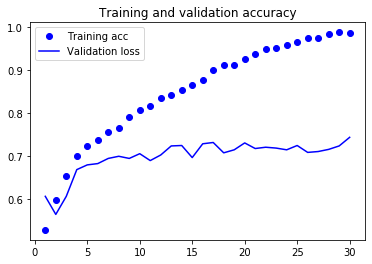

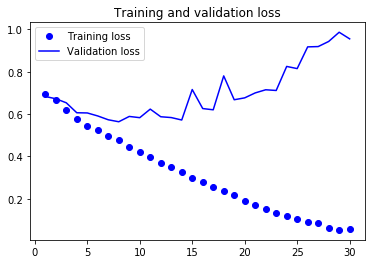

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 데이터 증식 사용하기

- rotation_range : 랜덤하게 사진을 회전시킬 각도 범위입니다(0~180 사이)
- width_shift_range, height_shift_range : 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다
- shear_range : 랜덤하게 전단 변환을 적용할 각도 범위입니다
- zoom_range : 랜덤하게 사진을 확대할 범위입니다
- horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집습니다 수평 대칭을 가정할 수 있을 때 사용합니다(풍경/인물)
- fill_mode : 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다

In [25]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

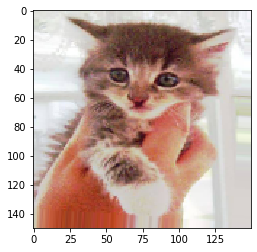

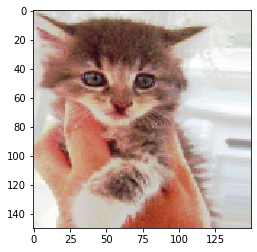

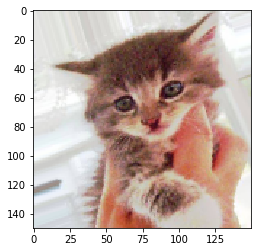

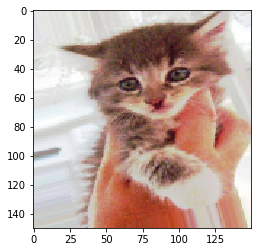

In [26]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 47s 468ms/step - loss: 0.6905 - acc: 0.5360 - val_loss: 0.6733 - val_acc: 0.6142
Epoch 2/100
100/100 [==============================] - 45s 447ms/step - loss: 0.6733 - acc: 0.5885 - val_loss: 0.6779 - val_acc: 0.5271
Epoch 3/100
100/100 [==============================] - 45s 452ms/step - loss: 0.6394 - acc: 0.6390 - val_loss: 0.6205 - val_acc: 0.6516
Epoch 4/100
100/100 [==============================] - 45s 451ms/step - loss: 0.5855 - acc: 0.6865 - val_loss: 0.7862 - val_acc: 0.5412
Epoch 5/100
100/100 [==============================] - 43s 428ms/step - loss: 0.5745 - acc: 0.6950 - val_loss: 0.5802 - val_acc: 0.6935
Epoch 6/100
100/100 [==============================] - 43s 429ms/step - loss: 0.5451 - acc: 0.7235 - val_loss: 0.5688 - val_acc: 0.6817
Epoch 7/100
100/100 [==============================] - 44s 441ms/step - loss: 0.5118 - acc: 0.7375 -

100/100 [==============================] - 45s 453ms/step - loss: 0.0549 - acc: 0.9810 - val_loss: 0.9678 - val_acc: 0.7538
Epoch 61/100
100/100 [==============================] - 45s 445ms/step - loss: 0.0429 - acc: 0.9845 - val_loss: 0.9429 - val_acc: 0.7648
Epoch 62/100
100/100 [==============================] - 45s 447ms/step - loss: 0.0512 - acc: 0.9840 - val_loss: 1.0169 - val_acc: 0.7665
Epoch 63/100
100/100 [==============================] - 44s 444ms/step - loss: 0.0432 - acc: 0.9870 - val_loss: 0.9849 - val_acc: 0.7700
Epoch 64/100
100/100 [==============================] - 43s 435ms/step - loss: 0.0412 - acc: 0.9860 - val_loss: 0.9751 - val_acc: 0.7713
Epoch 65/100
100/100 [==============================] - 45s 447ms/step - loss: 0.0437 - acc: 0.9860 - val_loss: 0.9962 - val_acc: 0.7709
Epoch 66/100
100/100 [==============================] - 44s 444ms/step - loss: 0.0375 - acc: 0.9875 - val_loss: 1.0024 - val_acc: 0.7816
Epoch 67/100
100/100 [==============================] 

In [31]:
model.save('cats_and_dogs_small_2.h5')